In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [22]:
df.shape

(20, 3)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

In [17]:
X = scalerX.fit_transform(df[['area','bedrooms']])
y = scalerY.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [19]:
def numpy_sigmoid(X):
    return 1+(1/np.exp(-X))

def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [24]:
np.ones(1)

array([1.])

Batch Gradient Descent

In [54]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_samples = X.shape[0]
    number_of_features = X.shape[1]
    w=np.ones(number_of_features)
    bias = 0
    cost_list = []
    epochs_list = []

    for i in range(epochs):
        y_pred = np.dot(w,X.transpose())+bias
        #y_pred = numpy_sigmoid(weighted_sum)
        w = w - learning_rate * ( (number_of_features/number_of_samples) * np.dot(X.transpose(), (y_pred - y_true)))
        bias = bias - learning_rate * np.mean(y_pred - y_true)
        cost = np.mean(np.square(y_pred - y_true))
        if i%10 == 0: 
            cost_list.append(cost)
            epochs_list.append(i)
    return w,bias,cost_list,epochs_list

In [63]:
w,bias,cost_list,epochs_list = batch_gradient_descent(X,y.reshape(y.shape[0],),5000)

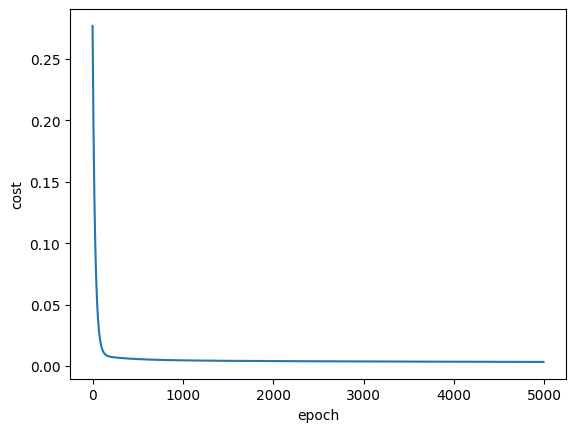

In [64]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epochs_list,cost_list)

In [83]:
np.random.permutation(5090)

array([1608, 1575, 3936, ..., 2153, 1695, 2749])